In [ ]:
# use the following methods to understand the clustering results:

# surrogate model to predict the cluster label for a given sample
# summarize the cluster by the mean of each feature
# visualize the clustering results in 2D or 3D

In [16]:
# sample data from https://www.openml.org/search?type=data&sort=runs&id=151&status=active
from scipy.io import arff
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

data, meta = arff.loadarff("electricity-normalized.arff")
electricity = pd.DataFrame(data)
electricity

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,b'2',0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,b'UP'
1,0.0000,b'2',0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,b'UP'
2,0.0000,b'2',0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,b'UP'
3,0.0000,b'2',0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,b'UP'
4,0.0000,b'2',0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,b'DOWN'
...,...,...,...,...,...,...,...,...,...
45307,0.9158,b'7',0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,b'DOWN'
45308,0.9158,b'7',0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,b'DOWN'
45309,0.9158,b'7',0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,b'DOWN'
45310,0.9158,b'7',0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,b'UP'


In [14]:
X = electricity.drop(columns=['day', 'class'])

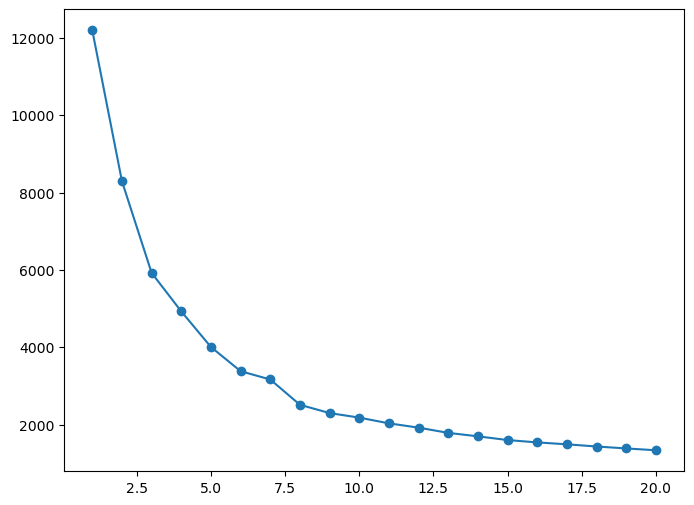

In [15]:
# get inertias for different numbers of clusters
inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto', max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')

c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\sit

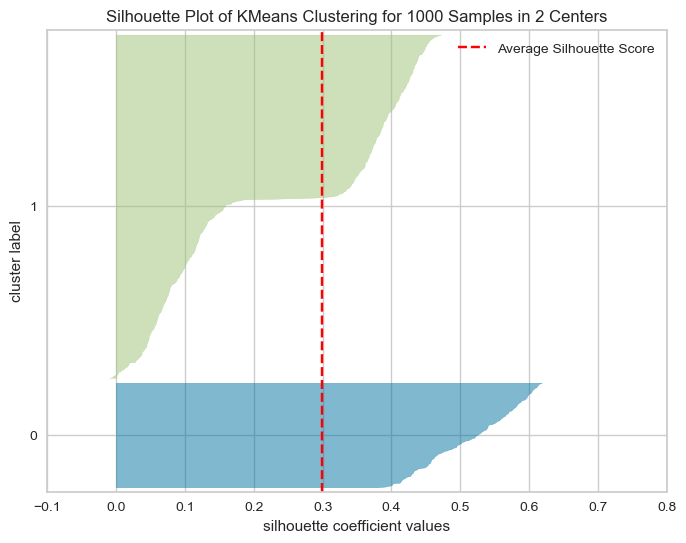

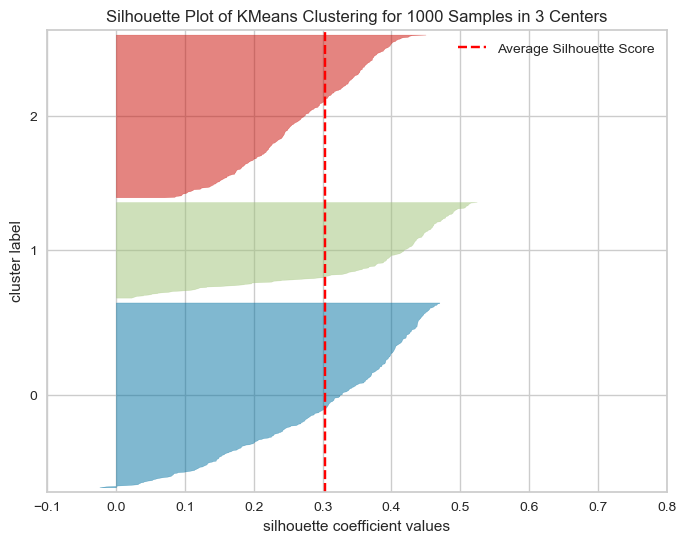

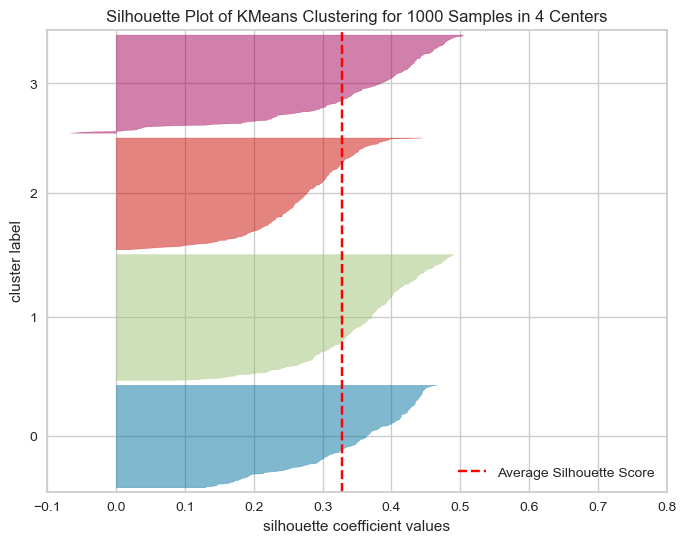

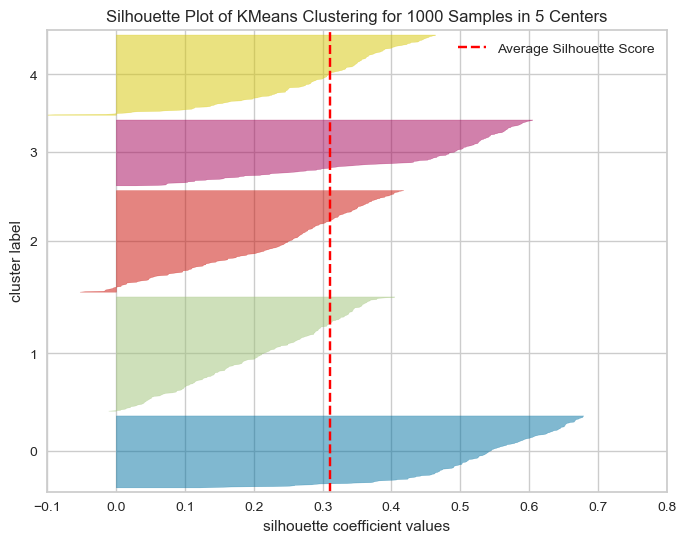

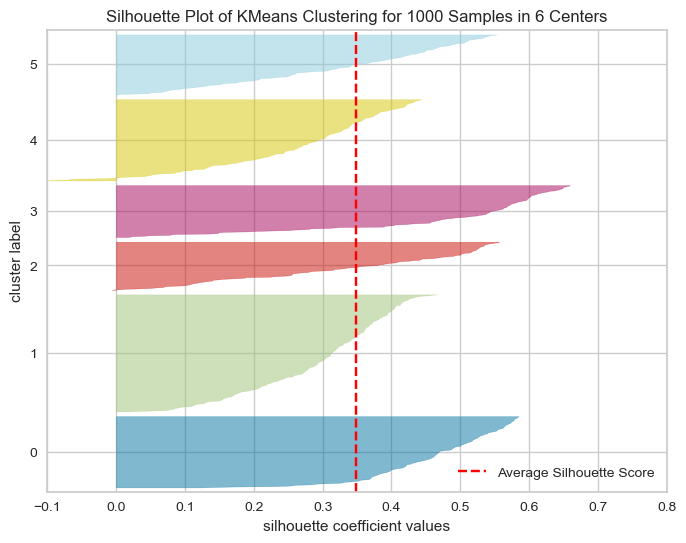

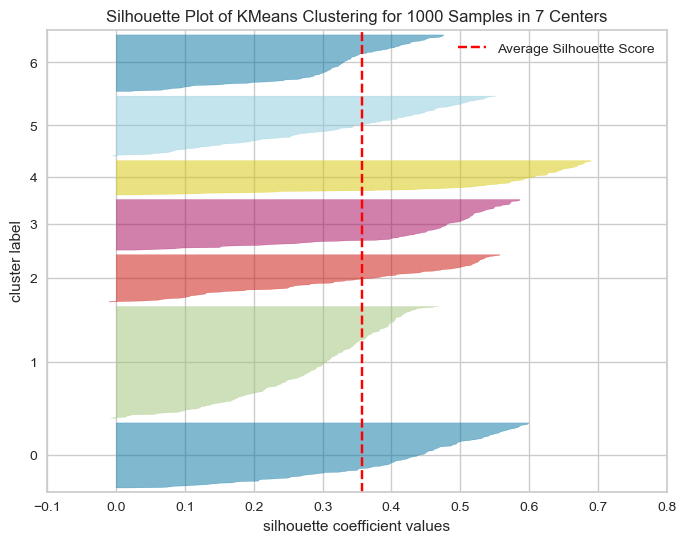

In [16]:
# get silhouette scores for different numbers of clusters
from yellowbrick.cluster import silhouette_visualizer

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto', max_iter=300, random_state=42)
    fig, ax = plt.subplots(figsize=(8, 6))
    viz = silhouette_visualizer(km, X.sample(1_000, random_state=42), colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, 0.8])

In [23]:
# summarize the results by group with 5 clusters

km = KMeans(n_clusters=5, n_init='auto', max_iter=300, random_state=42)
km.fit(X)
label = km.predict(X)
(electricity
 .assign(cluster=label) # add a new column with cluster values
 .groupby('cluster').agg('mean', numeric_only=True) # groupby cluster and calculate the mean
 .T # transpose the table with aggregated value and means
 .style.background_gradient(cmap='RdBu', axis='columns') # color the values from red to blue
 )

cluster,0,1,2,3,4
date,0.449737,0.663530,0.015973,0.892846,0.016750
period,0.660939,0.159503,0.718651,0.661352,0.210543
nswprice,0.057886,0.041514,0.075113,0.059872,0.066529
nswdemand,0.493199,0.268779,0.478473,0.518693,0.327772
vicprice,0.003851,0.002551,0.003467,0.003955,0.003467
vicdemand,0.445509,0.324571,0.422915,0.495387,0.422927
transfer,0.458564,0.612210,0.414912,0.525007,0.414866


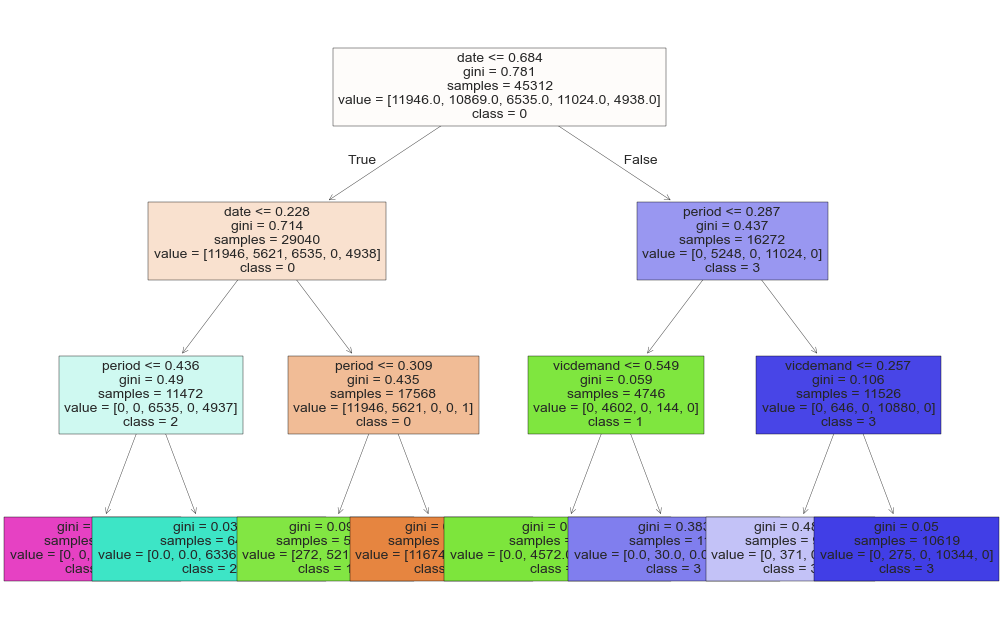

In [26]:
# summarize by surrogate model decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, label)
fig, ax = plt.subplots(figsize=(12, 8))
class_names = [str(i) for i in range(0, 5)]
_ = plot_tree(dt, ax=ax, feature_names=X.columns, class_names=class_names, filled=True, fontsize=10)

In [ ]:
# other clustering algorithms

# hierachical clustering - clusters by distance from clustering the two closest points, then the next closest points to the first cluster. 
# It is not as efficient as k-means but does not require to specify the number of clusters in advance. 
# It is also more robust to outliers than k-means.

# DBSCAN - clusters by density by finding the densest region of points and clusters them together.
# It is also more robust to outliers than k-means.

In [4]:
# play with Titanic dataset for k-means clustering

# drop the missing values
# drop the categorical features
# scale the features
# run k-means clustering
# use the elbow method to find the best K value

import pandas as pd

# https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

raw = pd.read_csv('titanic.csv')
raw.isna().sum() # find the columns with missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
raw.columns # list out all the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
def tweak_titanic(df):
    return (df
            .loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] # filter out non numeric columns
            .dropna() # drop missing values
            )

tweak_titanic(raw).isna().sum() # confirm there is no missing values

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# standardize the data to change the column values to the same scale
from sklearn.preprocessing import StandardScaler
# have sklearn output pandas
from sklearn import set_config

set_config(transform_output='pandas')
scaler = StandardScaler()
X = scaler.fit_transform(tweak_titanic(raw))

tweak_titanic(raw) # the original datast
X # the standardized dataset
X.describe() # confirm all column values are standardized with mean close to 0 and std close to 1

,Survived,Pclass,Age,SibSp,Parch,Fare
count,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02
mean,1.243947e-17,-5.473368e-17,2.338621e-16,-4.975789e-18,-7.214895e-17,-5.970947e-17
std,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00
min,-8.270201e-01,-1.476364e+00,-2.016979e+00,-5.517031e-01,-5.058951e-01,-6.560759e-01
25%,-8.270201e-01,-1.476364e+00,-6.595416e-01,-5.517031e-01,-5.058951e-01,-5.038498e-01
50%,-8.270201e-01,-2.825656e-01,-1.170488e-01,-5.517031e-01,-5.058951e-01,-3.583992e-01
75%,1.209160e+00,9.112324e-01,5.718310e-01,5.245701e-01,6.668618e-01,-2.495211e-02
max,1.209160e+00,9.112324e-01,3.465126e+00,4.829663e+00,6.530646e+00,9.032109e+00


c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\Lib\sit

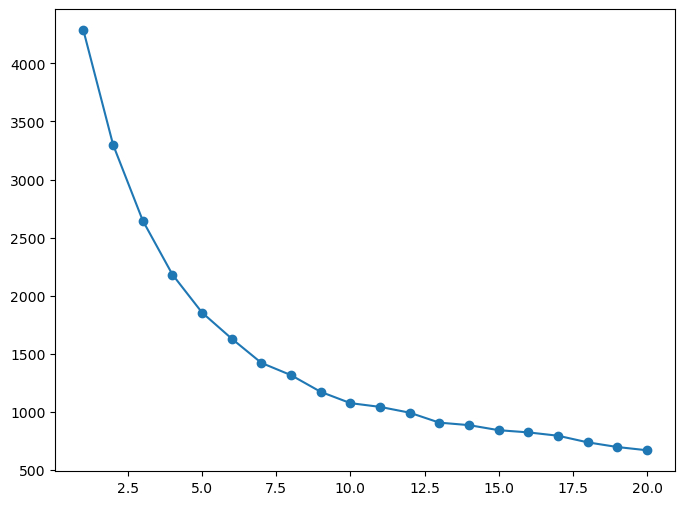

In [17]:
inertias = []
for i in range(20):
    km = KMeans(n_clusters=i+1, n_init=1, max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, 21), inertias, marker='o')